In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)

# Reading the dataset

In [28]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
data_dict = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

***Take a quick look to see what's inside***

In [29]:
print(f"Train shape: {train.shape}, Test shape: {test.shape}")
display(train.head())
display(test.head())

Train shape: (3960, 82), Test shape: (20, 59)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Examine the dataset

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

***The distribution of target values***

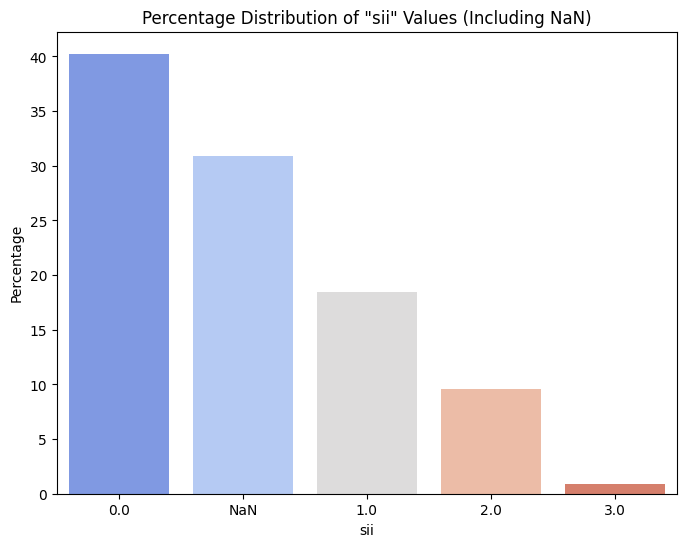

In [31]:
# Calculate value counts and percentages for 'sii' including NaN values
sii_counts = train['sii'].value_counts(dropna=False) 
sii_percentage = (sii_counts / len(train)) * 100

# Prepare data for visualization
sii_percentage_df = sii_percentage.reset_index()
sii_percentage_df.columns = ['sii', 'Percentage']

# Convert NaN to a string for better visualization
sii_percentage_df['sii'] = sii_percentage_df['sii'].fillna('NaN')

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=sii_percentage_df, x='sii', y='Percentage', palette='coolwarm')
plt.title('Percentage Distribution of "sii" Values (Including NaN)')
plt.xlabel('sii')
plt.ylabel('Percentage')
plt.show()


We can see the dataset is highly imbalanced, and the NaN values percentage is quite high, at roughly 31%

***Percentage missing values***

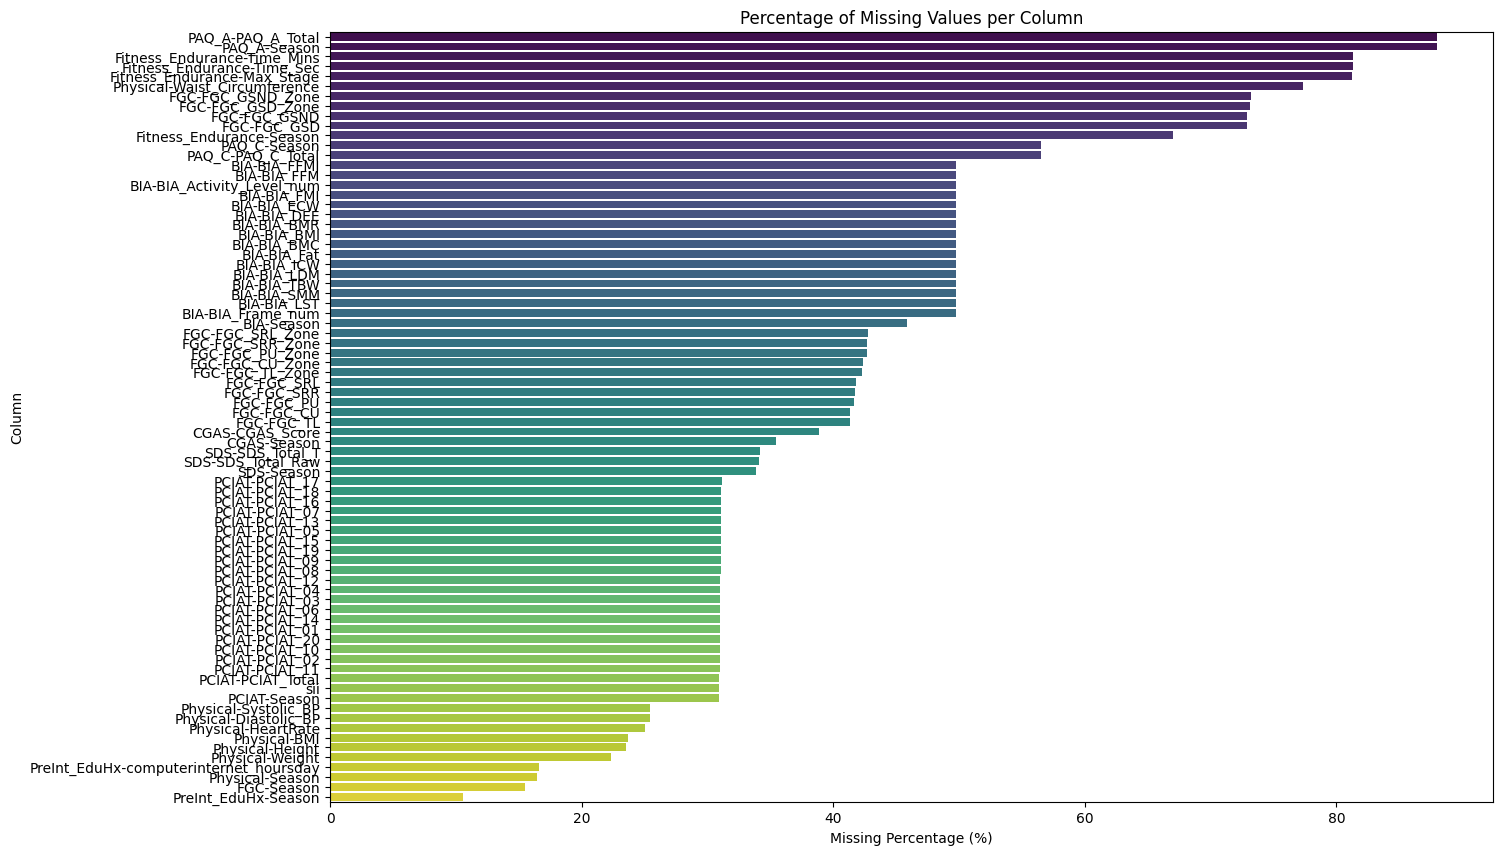

In [32]:
# Calculate missing values
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Percentage': missing_percentage
})
missing_data = missing_data[missing_data['Missing_Percentage'] > 0].sort_values(by='Missing_Percentage', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(
    data=missing_data,
    x='Missing_Percentage',
    y='Column',
    palette='viridis'
)
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Missing Percentage (%)')
plt.show()


<div style="line-height:24px; font-size:18px"> 
     There are so many missing values in these features, it's safe to say that we are dropping some of these when training model
</div>

In [33]:
print('Columns missing in test:')
print([f for f in train.columns if f not in test.columns])

Columns missing in test:
['PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total', 'sii']





* Although the target column **sii** is predicted using PCIAT-PCIAT_Total, and PCIAT-PCIAT_Total is calculated using 20 PCIAT questions 1-20, the test set doesn't have these columns, so we might want to consider dropping these missing columns and focus on predicting **sii** column on other features, treat this problem as a classification problem.
* At the same time, we can predict PCIAT-PCIAT_Total and convert it to **sii**, if we consider this problem as a regression problem

<div style="line-height:24px; font-size:18px"> 
     We will dropping all the PCIAT Question and PCIAT Season, just leave the PCIAT Total for analysis
</div>

In [34]:
PCIAT_cols = [val for val in train.columns[train.columns.str.contains('PCIAT')]]
PCIAT_cols.remove('PCIAT-PCIAT_Total')
train = train.drop(columns = PCIAT_cols)
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,Fall,2.340,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,Summer,2.170,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,Winter,2.451,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
numerical_df = train.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
corr = correlation_matrix['sii'].sort_values(ascending=False)
corr_df = pd.DataFrame(corr)
corr_df

,sii
sii,1.000000
PCIAT-PCIAT_Total,0.899681
Physical-Height,0.373530
Basic_Demos-Age,0.365990
PreInt_EduHx-computerinternet_hoursday,0.336526
Physical-Weight,0.325938
Physical-Waist_Circumference,0.272885
FGC-FGC_CU,0.247364
SDS-SDS_Total_T,0.232982
SDS-SDS_Total_Raw,0.229692


<div style="line-height:24px; font-size:18px"> 
       Because we have so many features so we must consider what features to examine. Here, I will analyze the feature based on its high correlation with the target variable sii first
</div>

# Demographics

<div style="line-height:24px; font-size:20px;border-left: 5px solid silver; padding-left: 26px;"> 
        Gender
</div>

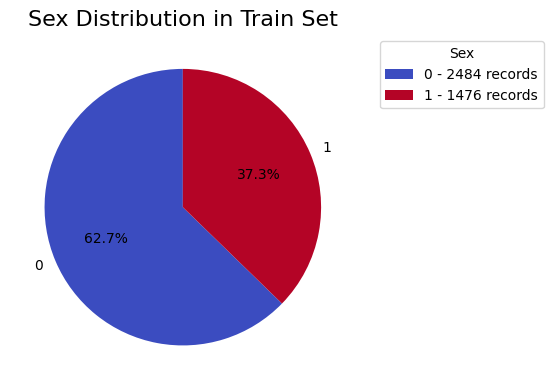

In [36]:
gender_records = train['Basic_Demos-Sex'].value_counts()

sex_counts = train['Basic_Demos-Sex'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))

sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', ylabel='')
plt.title('Sex Distribution in Train Set', fontsize=16)
plt.legend(title='Sex', labels=[f'{label} - {count} records' for label, count in gender_records.items()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="line-height:24px; font-size:16px"> 
        We see that there are more male data records than female
</div>

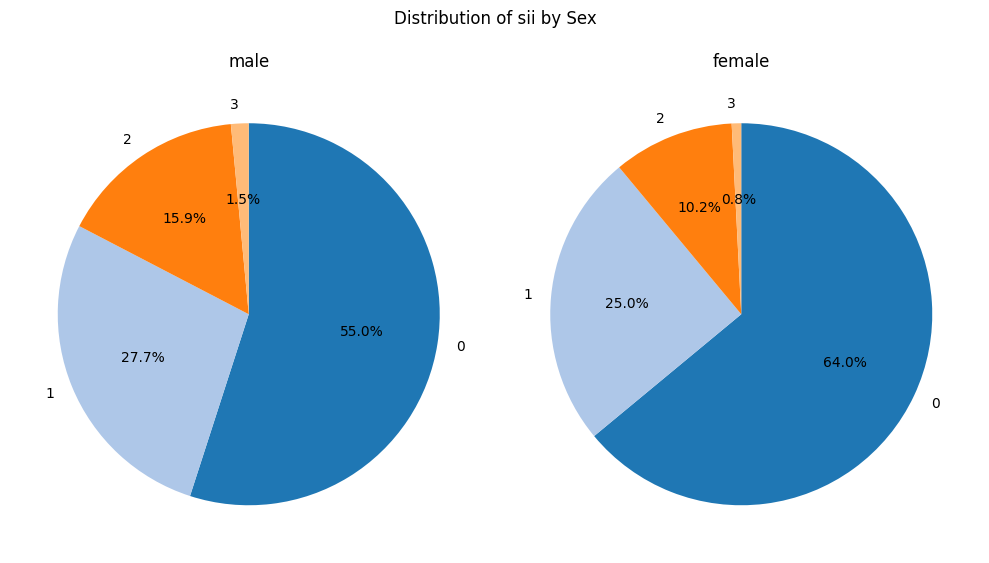

In [37]:
genders = train['Basic_Demos-Sex'].unique()
gender_map = {0: 'male', 1: 'female'}
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

for ax, gender in zip(axes, genders):
    data = train.loc[train['Basic_Demos-Sex'] == gender]
    value_counts = data['sii'].value_counts(dropna=True).sort_index()
    labels = value_counts.index.astype(int).astype(str).tolist()

    ax.pie(
        value_counts.values, labels=labels, autopct='%1.1f%%',
        colors=plt.cm.tab20.colors, startangle=90, counterclock=False
    )

    ax.set_title(gender_map[gender])

plt.suptitle('Distribution of sii by Sex')
plt.tight_layout()


<div style="line-height:24px; font-size:16px"> 
        These two distribution show that there are little difference in SII between male and female
</div>

<div style="line-height:24px; font-size:20px;border-left: 5px solid silver; padding-left: 26px;"> 
        Age
</div>

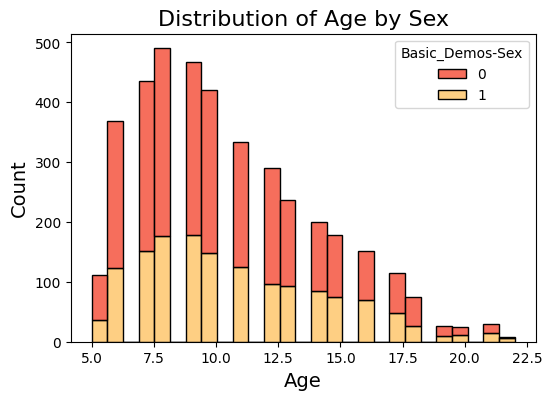

In [38]:

plt.figure(figsize=(6, 4))
sns.histplot(data=train, x='Basic_Demos-Age', hue='Basic_Demos-Sex', multiple='stack', palette='YlOrRd_r')
plt.title('Distribution of Age by Sex', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


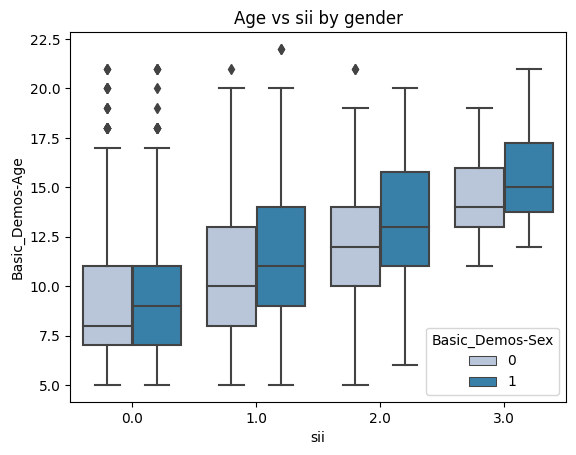

In [39]:
sns.boxplot(data=train, y=train['Basic_Demos-Age'], x=train['sii'], hue=train['Basic_Demos-Sex'],  palette = 'PuBu')
plt.title('Age vs sii by gender')
plt.show()

<div style="line-height:24px; font-size:16px"> 
        As the age increases, they will have higher severity impairment index
</div>

<div style="line-height:24px; font-size:20px;border-left: 5px solid silver; padding-left: 26px;"> 
        Season of Enrollment
</div>



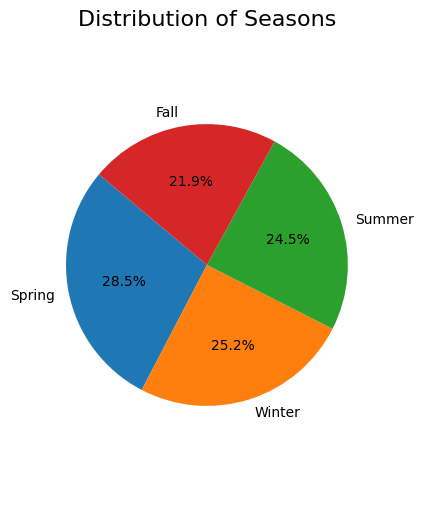

In [40]:
season_counts = train['Basic_Demos-Enroll_Season'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seasons', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Internet Use

<div style="line-height:24px; font-size:20px;border-left: 5px solid silver; padding-left: 26px;"> 
        Season
</div>

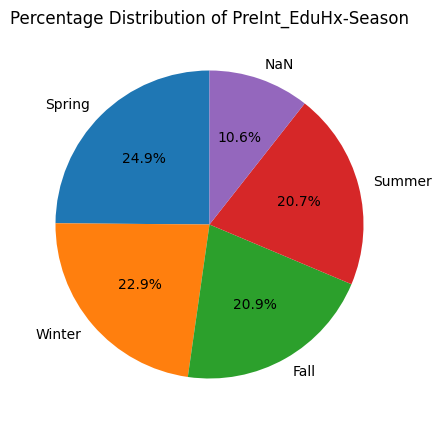

In [41]:
edu_season_counts = train['PreInt_EduHx-Season'].value_counts(dropna=False, normalize=True) * 100

# Convert to DataFrame for better handling
edu_season_df = edu_season_counts.reset_index()
edu_season_df.columns = ['Season', 'Percentage']

# Replace NaN with a string to plot
edu_season_df['Season'] = edu_season_df['Season'].fillna('NaN')

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(edu_season_df['Percentage'], labels=edu_season_df['Season'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of PreInt_EduHx-Season')
plt.show()

<div style="line-height:24px; font-size:20px;border-left: 5px solid silver; padding-left: 26px;"> 
    Hours of Using Internet
</div>

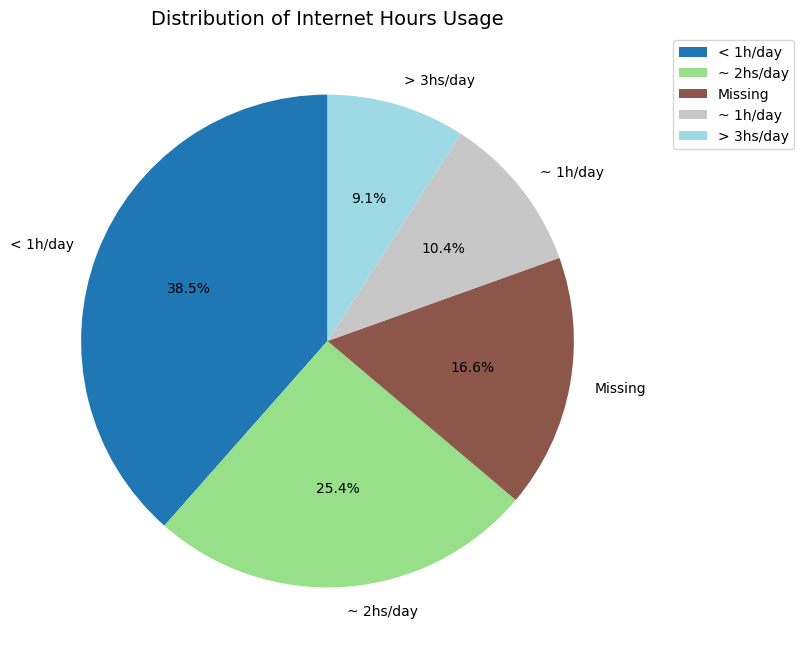

In [42]:
legend_mapping = {
    0: '< 1h/day',
    1: '~ 1h/day',
    2: '~ 2hs/day',
    3: '> 3hs/day',
    'NaN': 'Missing'
}

value_nan = train['PreInt_EduHx-computerinternet_hoursday'].value_counts(dropna=False)
    
value_nan.index = value_nan.index.fillna('NaN')
value_nan.index = value_nan.index.map(legend_mapping)
    
plt.figure(figsize=(8, 8))
value_nan.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title('Distribution of Internet Hours Usage', fontsize=14)
plt.ylabel('') 
plt.legend(value_nan.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

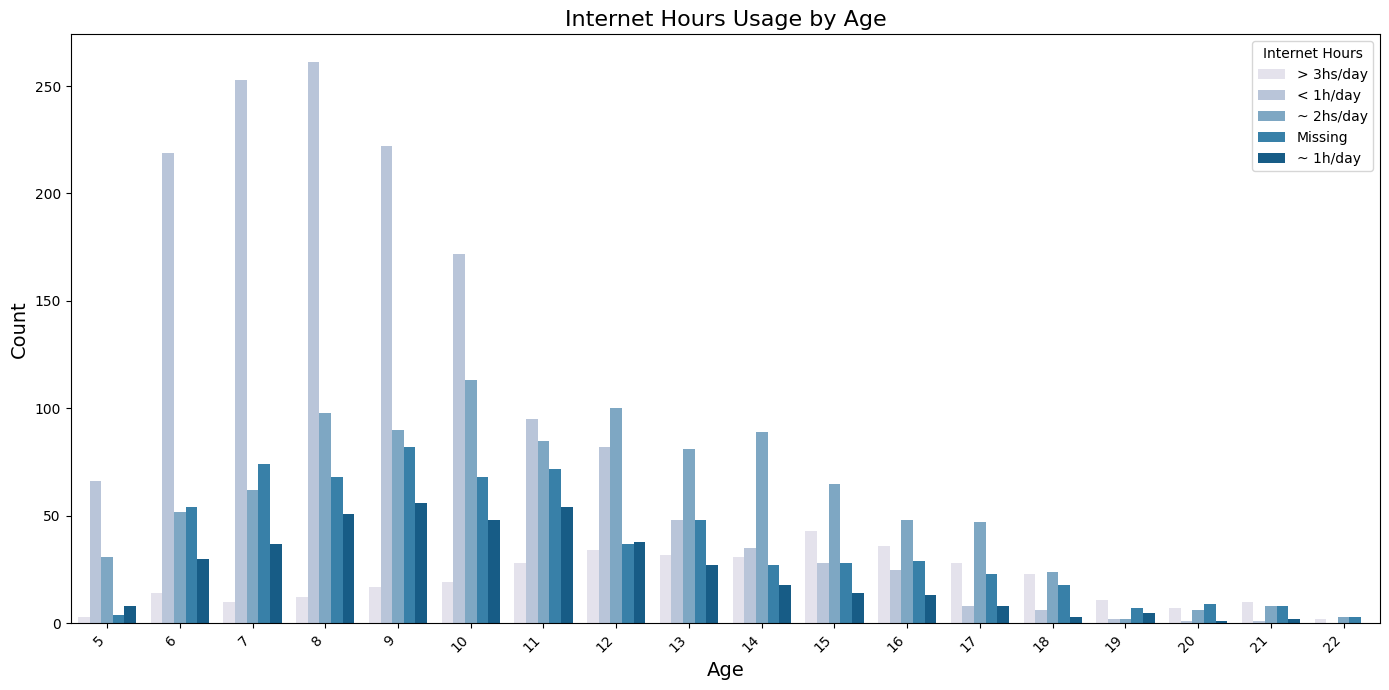

In [43]:
hours_column = 'PreInt_EduHx-computerinternet_hoursday'
age_column = 'Basic_Demos-Age'

plot_df = train[[age_column, hours_column]].copy()
plot_df[hours_column] = plot_df[hours_column].fillna('NaN')
plot_df[hours_column] = plot_df[hours_column].replace({float('NaN'): 'Missing'}).map(legend_mapping)

plt.figure(figsize=(14, 7))
sns.countplot(data=plot_df, x=age_column, hue=hours_column, palette='PuBu')
plt.title('Internet Hours Usage by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Internet Hours', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


<div style="line-height:24px; font-size:16px"> 
        <ul>
        <li>We see that from the age of 5-10, most of them use the Internet less than 1h/day. They start using Internet more as the age increases, with 2hs/day being the most popular choice. 
        <li>This indicates that the mininal Internet usage may be associated with low SII levels
        <li> We also see there are major missing value ranging in every age. Maybe some individuals, especially in certain age groups, may not track or report their internet usage accurately.
        </ul>
</div>

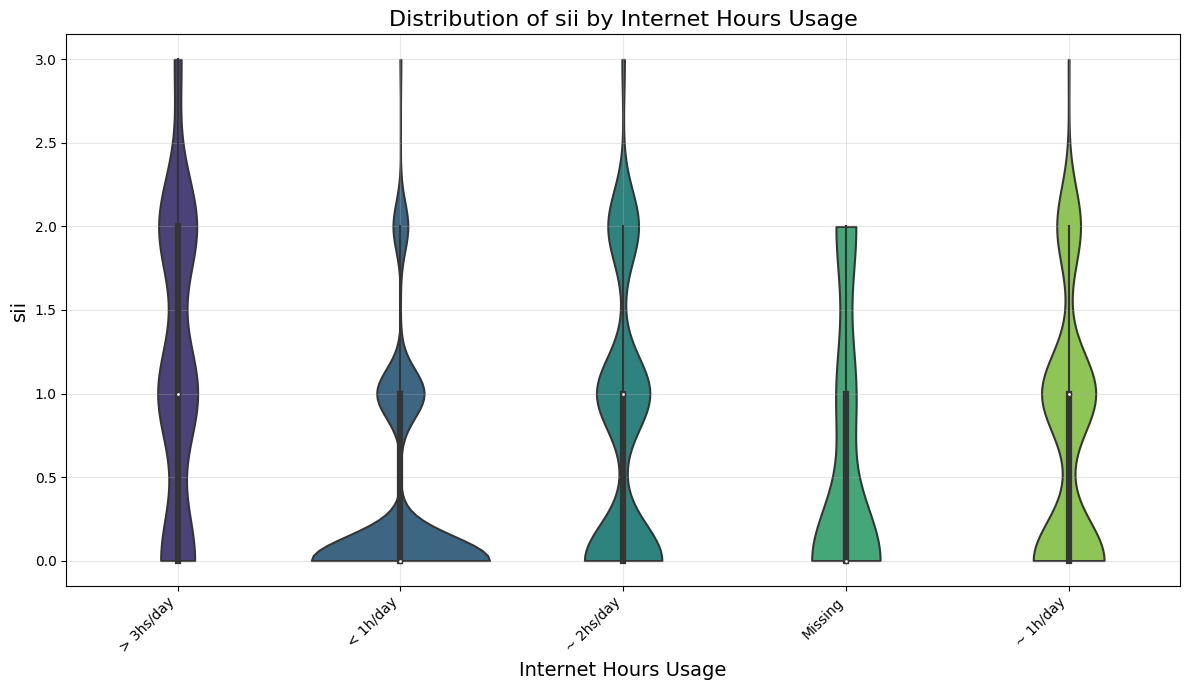

In [44]:
plot_df = train[[hours_column, 'sii']].copy()
plot_df[hours_column] = plot_df[hours_column].fillna('NaN').map(legend_mapping)
    
    # Plot a violin plot to show the distribution of SII scores by Internet Hours usage
plt.figure(figsize=(12, 7))
sns.violinplot(data=plot_df, x=hours_column, y='sii', palette='viridis', cut=0)
plt.title('Distribution of sii by Internet Hours Usage', fontsize=16)
plt.xlabel('Internet Hours Usage', fontsize=14)
plt.ylabel('sii', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Physical Health

In [45]:
physical_features = [
    'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
    'Physical-Diastolic_BP', 'Physical-Systolic_BP', 'Physical-HeartRate'
]
physical_df = train[physical_features]
pd.DataFrame({
    'min': physical_df.min(),
    'max': physical_df.max().round(1)
})

,min,max
Physical-BMI,0.0,59.1
Physical-Height,33.0,78.5
Physical-Weight,0.0,315.0
Physical-Waist_Circumference,18.0,50.0
Physical-Diastolic_BP,0.0,179.0
Physical-Systolic_BP,0.0,203.0
Physical-HeartRate,27.0,138.0


<div style="line-height:24px; font-size:16px"> 
        How can weight be 0, and how can it be as high as 315? We might expect some outliers here.
</div>

<Figure size 1000x1000 with 0 Axes>

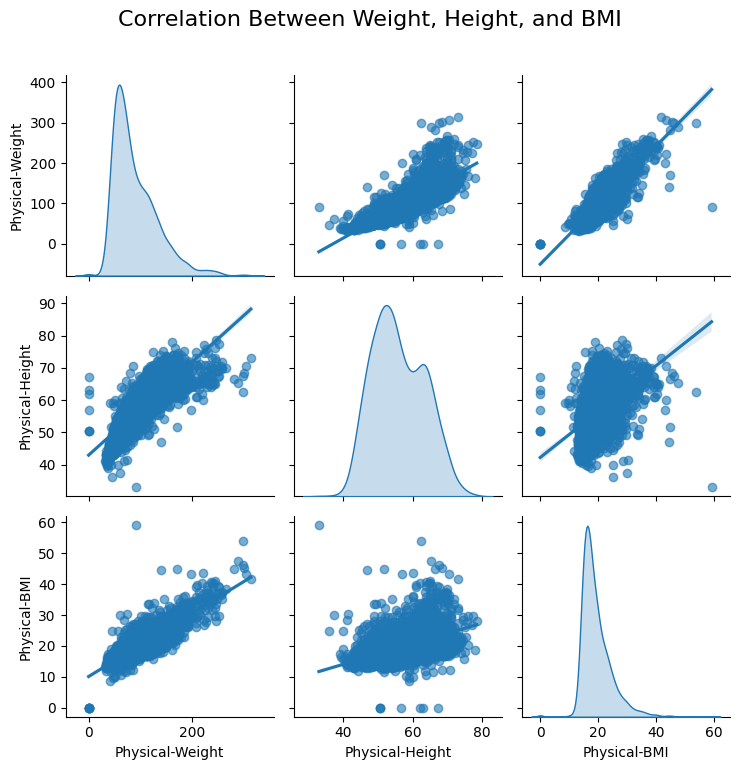

In [46]:
weight_column = 'Physical-Weight' 
height_column = 'Physical-Height' 
bmi_column = 'Physical-BMI'  

plot_df = train[[weight_column, height_column, bmi_column]].dropna()
    
    # Create a pairplot to visualize correlations
plt.figure(figsize=(10, 10))
sns.pairplot(plot_df, kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.6}})
plt.suptitle('Correlation Between Weight, Height, and BMI', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Waist Circumference')

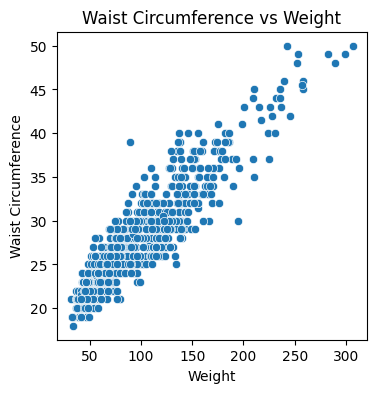

In [47]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='Physical-Weight', y='Physical-Waist_Circumference', data=train)
plt.title('Waist Circumference vs Weight')
plt.xlabel('Weight')
plt.ylabel('Waist Circumference')

<div style="line-height:24px; font-size:16px"> 
        <ul>
        <li>Height, Waist Circumference and BMI, all of them have a clear correlation with Weight.
        <li>Not only do they have high correlation with each other, they also have high correlation with sii, so we might want to include these columns into the model training session
        </ul>
</div>

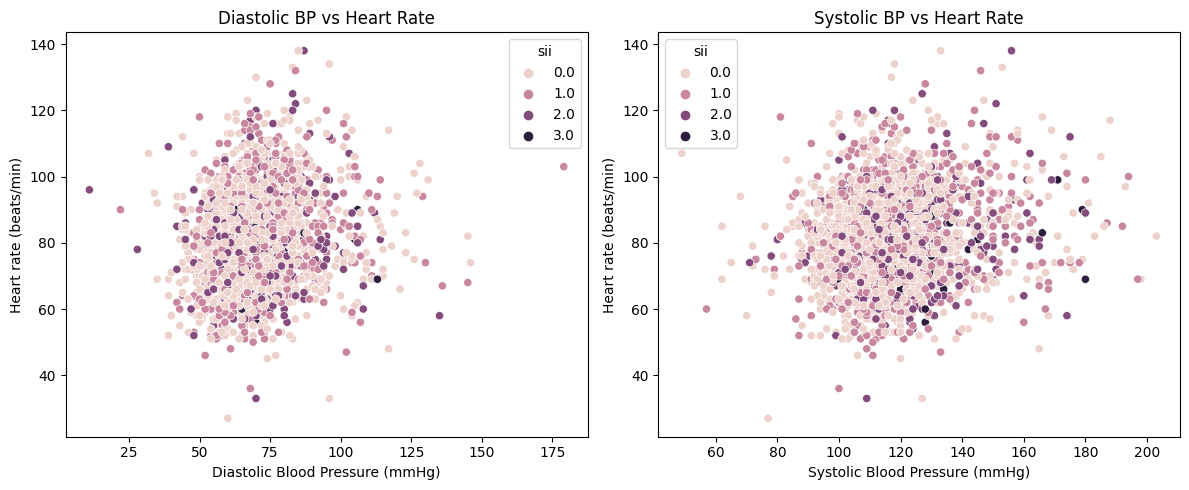

In [48]:
plt.figure(figsize=(12, 5))

# Diastolic BP vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Physical-Diastolic_BP', 
    y='Physical-HeartRate',
    hue='sii',
    data=train
)
plt.title('Diastolic BP vs Heart Rate')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

# Systolic BP vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Physical-Systolic_BP', 
    y='Physical-HeartRate',
    hue='sii',
    data=train
)
plt.title('Systolic BP vs Heart Rate')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

plt.tight_layout()
plt.show()


<div style="line-height:24px; font-size:16px"> 
        Many research papers have shown that BMI has a notably strong positive correlation with both BP, and both BP have high correlation with each other as well. Let's see if this is true with our dataset ?
</div>

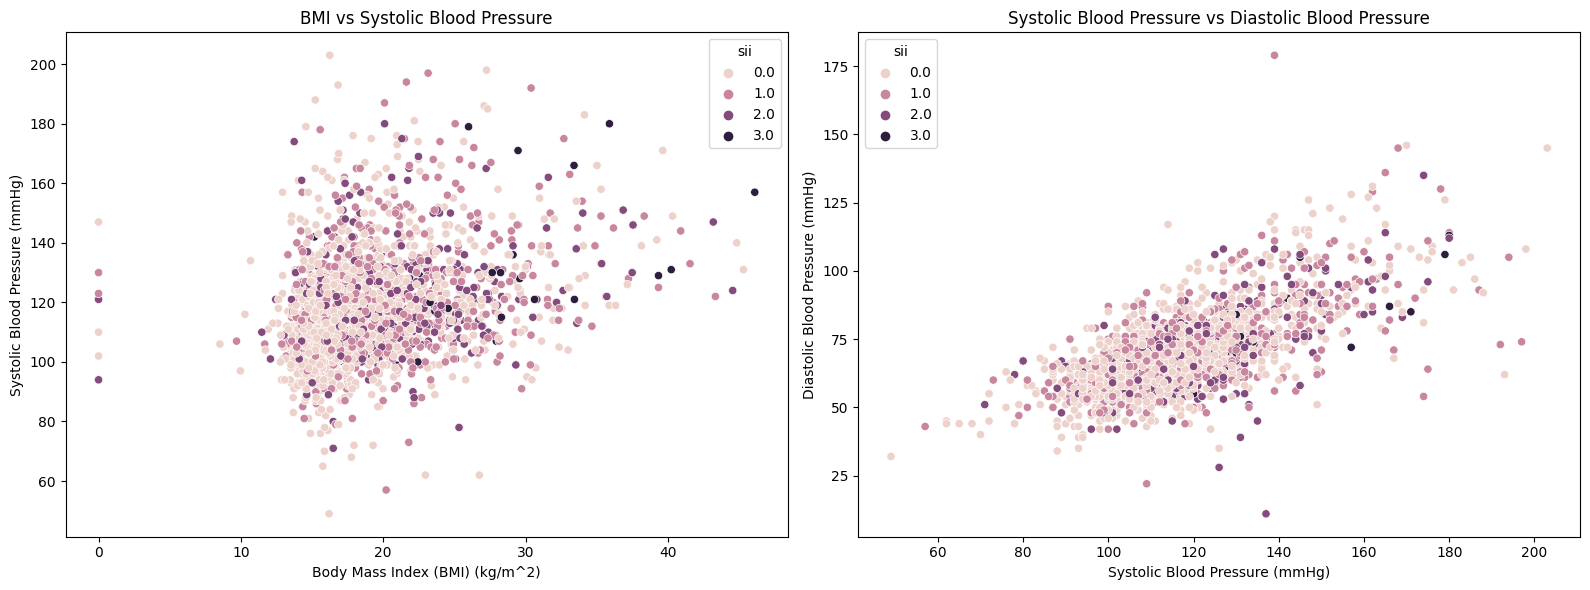

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BMI vs Systolic Blood Pressure
sns.scatterplot(
    x='Physical-BMI', 
    y='Physical-Systolic_BP',
    hue='sii',
    data=train, ax=axes[0], color='b')
axes[0].set_title('BMI vs Systolic Blood Pressure')
axes[0].set_xlabel('Body Mass Index (BMI) (kg/m^2)')
axes[0].set_ylabel('Systolic Blood Pressure (mmHg)')

# Systolic Blood Pressure vs Diastolic Blood Pressure
sns.scatterplot(
    x='Physical-Systolic_BP', 
    y='Physical-Diastolic_BP',
    hue='sii',
    data=train, ax=axes[1], color='g'
)
axes[1].set_title('Systolic Blood Pressure vs Diastolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure')
axes[1].set_ylabel('Diastolic Blood Pressure')

plt.tight_layout()
plt.show()

<div style="line-height:24px; font-size:16px"> 
      There does not appear to be a strong, clear correlation between body mass index (BMI) and systolic blood pressure (BP).
</div>

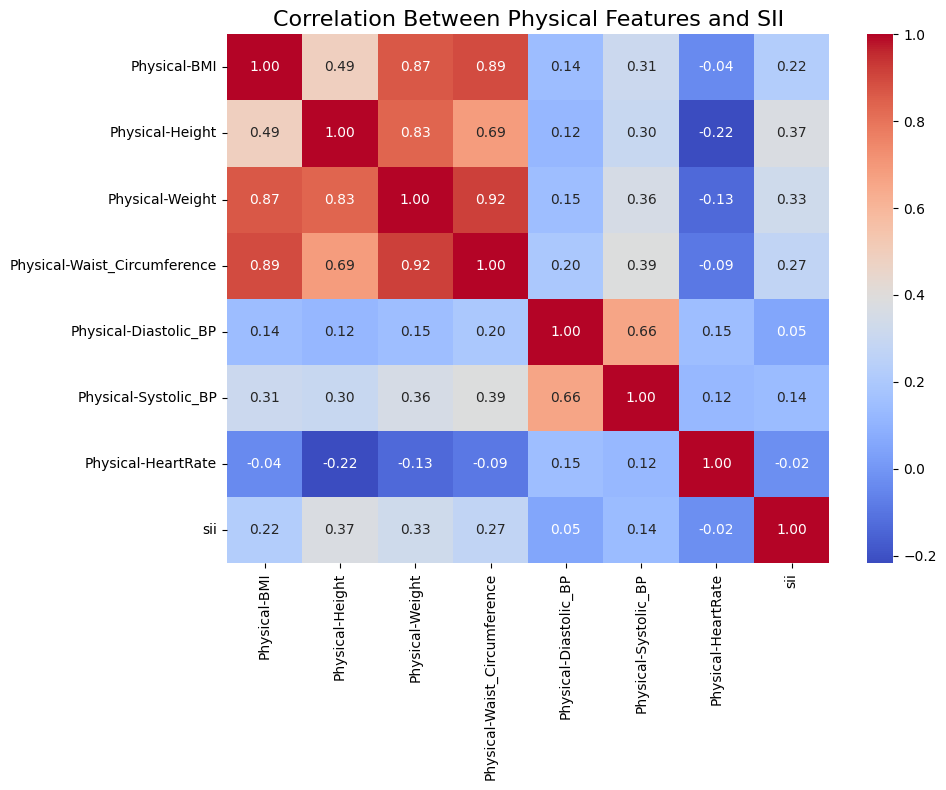

In [51]:
column_for_corr = physical_features + ['sii']

correlation_df = train[column_for_corr].copy()
    
correlation_matrix = correlation_df.corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Physical Features and SII', fontsize=16)
plt.tight_layout()
plt.show()

# Bio-electric Impedance Analysis

 Bio-electric Impedance Analysis is a method for estimating body composition, in particular **body fat** and **muscle mass**, where a weak electric current flows through the body, and the voltage is measured in order to calculate impedance (resistance and reactance) of the body.

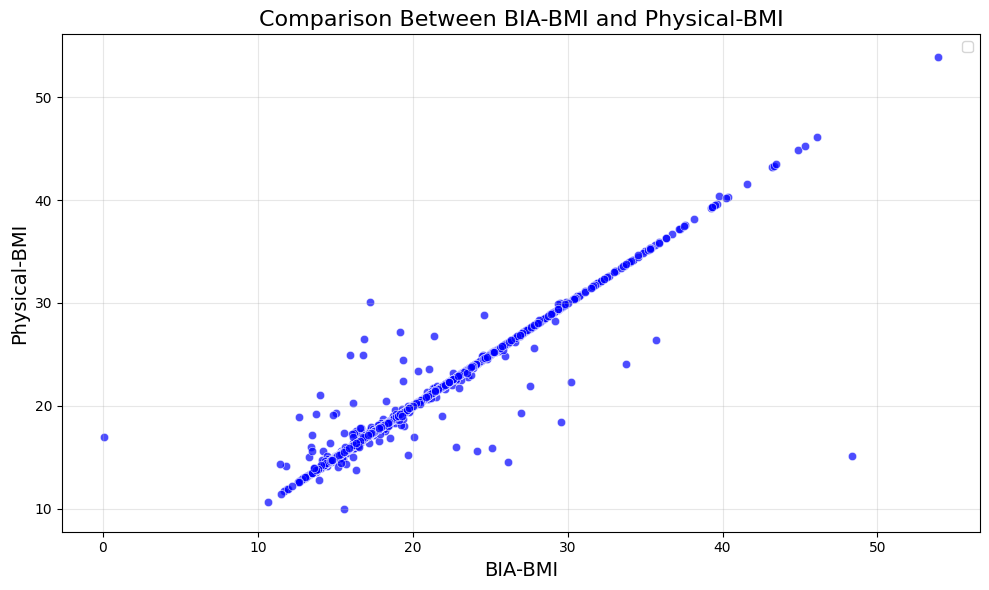

In [67]:
 plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='BIA-BIA_BMI', y='Physical-BMI', alpha=0.7, color='blue')
plt.title('Comparison Between BIA-BMI and Physical-BMI', fontsize=16)
plt.xlabel('BIA-BMI', fontsize=14)
plt.ylabel('Physical-BMI', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="line-height:24px; font-size:16px"> 
      <ul>
    <li>We expect these two BMI to be exactly the same, but it seems that there are quite a few data error (maybe outliers, or miscalculation ??)
    <li>The problem with these data error is that, we do not know which one is the one being miscalculated.
      </ul>
</div>

In [76]:
bia_data_dict = data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']
bia_columns = bia_data_dict['Field'].tolist()
bia_columns

['BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']

In [80]:
train[bia_columns].describe()

,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.00000,1991.000000,1991.000000,1991.000000
mean,2.651431,6.719826,19.367048,1237.018187,2064.693747,20.825346,74.021708,15.030554,4.336495,16.855020,1.745354,33.173380,20.02299,67.301883,34.389466,53.998726
std,1.028267,92.586325,5.047848,1872.383246,2836.246272,73.266287,199.433753,5.792505,6.356402,199.372119,0.680635,56.272346,70.21561,108.705918,84.050607,129.362539
min,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,14.489000,4.63581,23.620100,4.655730,20.589200
25%,2.000000,2.966905,15.913600,1004.710000,1605.785000,11.109550,49.278100,13.408000,2.306915,8.602395,1.000000,24.463500,12.98315,45.204100,21.141550,35.887000
50%,3.000000,3.922720,17.966500,1115.380000,1863.980000,15.928000,61.066200,14.092500,3.698630,16.174600,2.000000,28.855800,16.43880,56.996400,27.415100,44.987000
75%,3.000000,5.460925,21.461100,1310.360000,2218.145000,25.162200,81.833800,15.430950,5.987690,30.273100,2.000000,35.475700,22.16760,77.105650,38.179400,60.271050
max,5.000000,4115.360000,53.924300,83152.200000,124728.000000,3233.000000,8799.080000,217.771000,28.251500,153.820000,3.000000,2457.910000,3108.17000,4683.710000,3607.690000,5690.910000


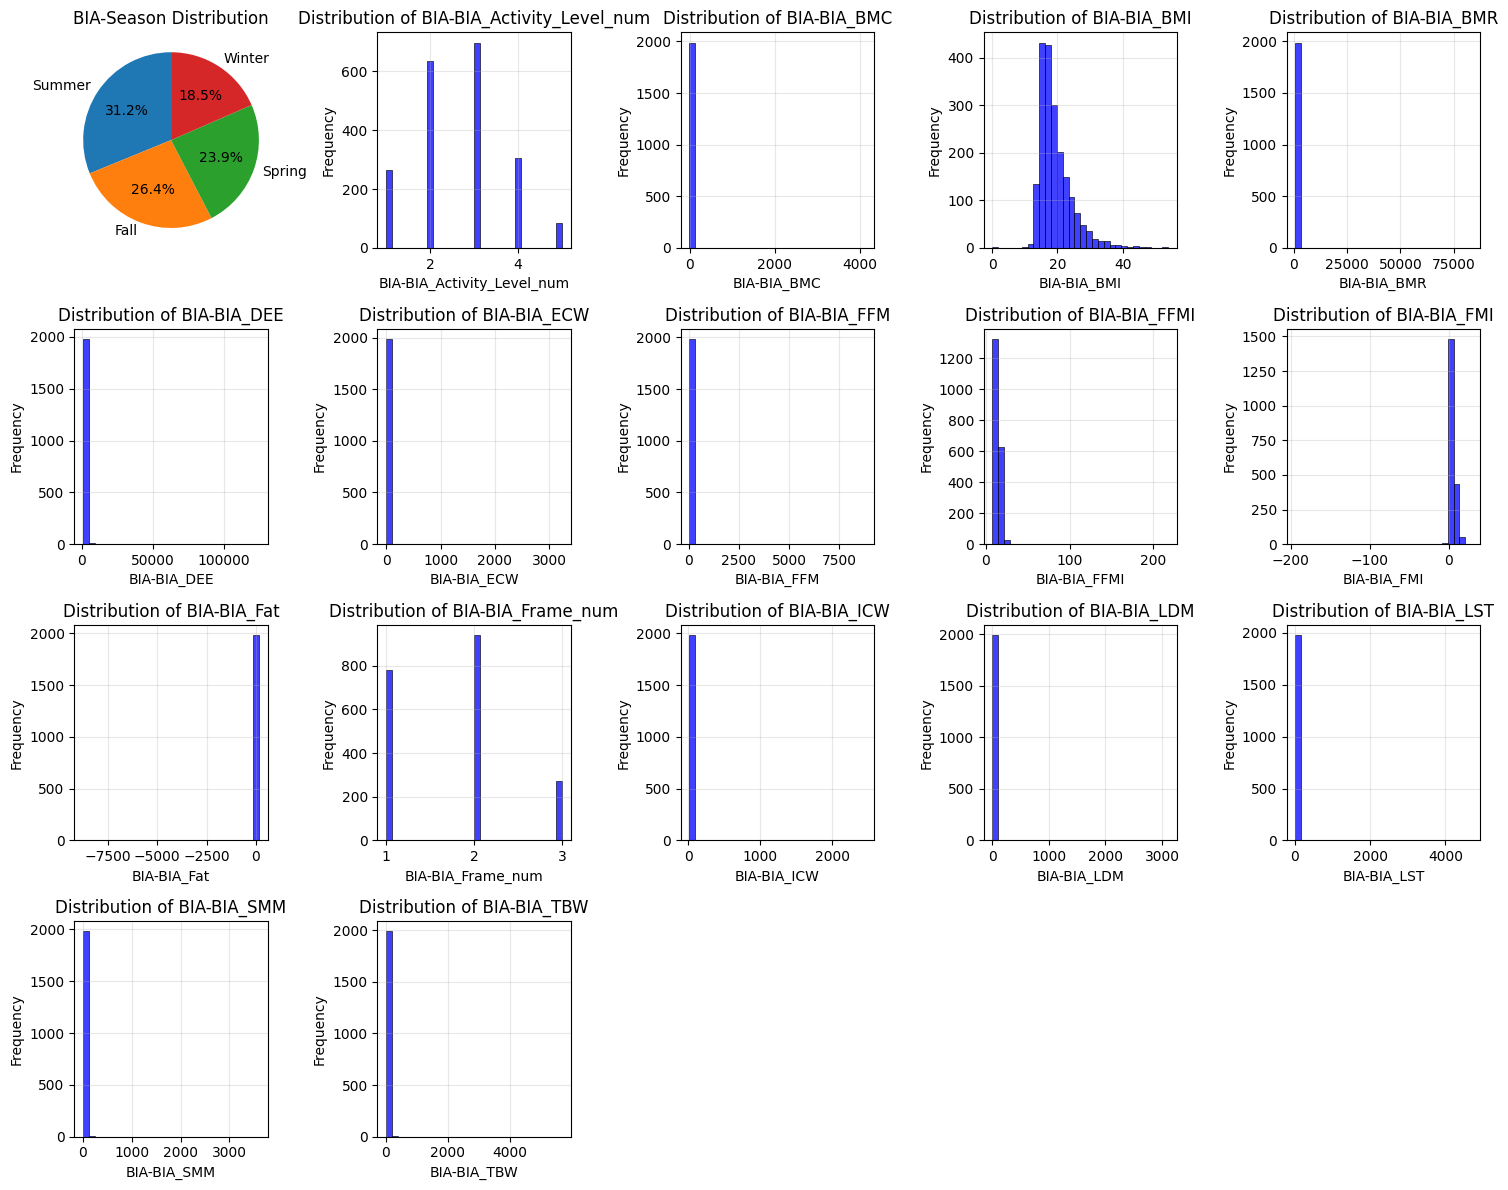

In [81]:
# Create a figure to plot the distribution of the BIA-related columns
plt.figure(figsize=(15, 12))

# Plot pie chart for 'BIA-Season'
plt.subplot(4, 5, 1)
bia_season_counts = train['BIA-Season'].value_counts()
plt.pie(bia_season_counts, labels=bia_season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('BIA-Season Distribution')
plt.axis('equal')
    
for i, column in enumerate(bia_columns[1:], 2):
    plt.subplot(4, 5, i)
    sns.histplot(data=train, x=column, color='blue', bins=30)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.3)
    
plt.tight_layout()
plt.show()

<div style="line-height:24px; font-size:16px"> 
      <ul>
        <li>Many of these variables are heavily skewed toward low values, with a sharp peak near zero. This could imply that most of the data points for these features are clustered around zero, and only a small number of observations have values spread across a wider range.
          <li>Variables like BIA-BIA_Fat, BIA-BIA_FMI, ..., might have erroneous negative values or values far outside the expected range. This suggests there could be incorrect data entries, misencoded values, or outliers that need cleaning or validation.
</ul>
</div>

# Sleep Disturbance Scale

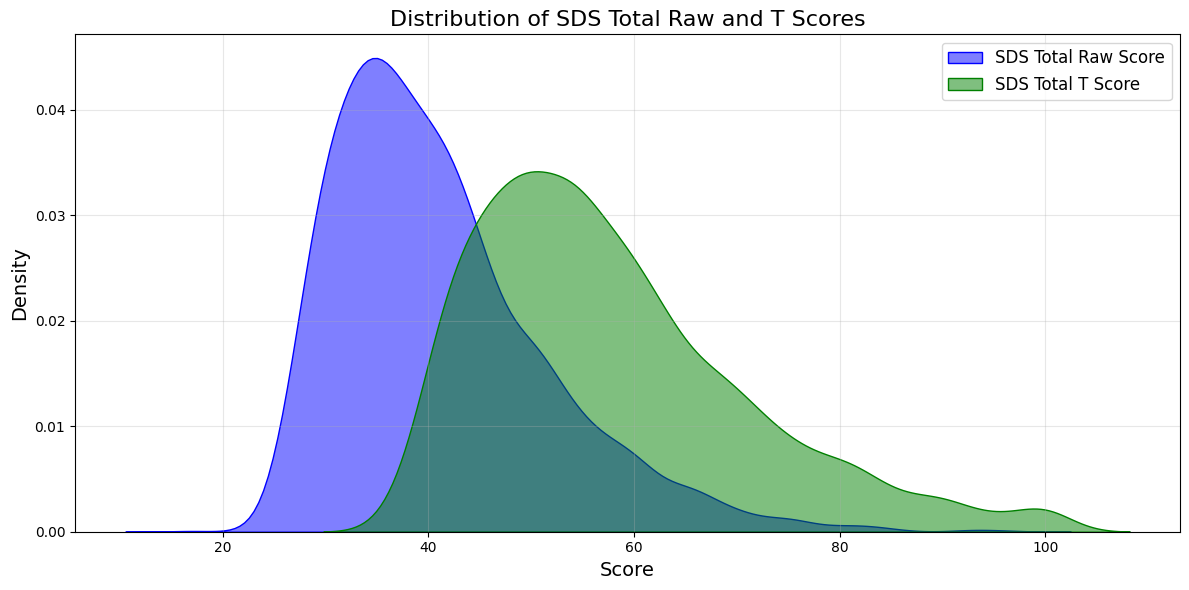

In [57]:
sds_raw_column = 'SDS-SDS_Total_Raw'
sds_t_column = 'SDS-SDS_Total_T'

sds_data = train[[sds_raw_column, sds_t_column]]
    
    # Plot the distribution of both scores
plt.figure(figsize=(12, 6))
sns.kdeplot(sds_data[sds_raw_column], label='SDS Total Raw Score', fill=True, alpha=0.5, color='blue')
sns.kdeplot(sds_data[sds_t_column], label='SDS Total T Score', fill=True, alpha=0.5, color='green')
plt.title('Distribution of SDS Total Raw and T Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)    
plt.tight_layout()
plt.show()

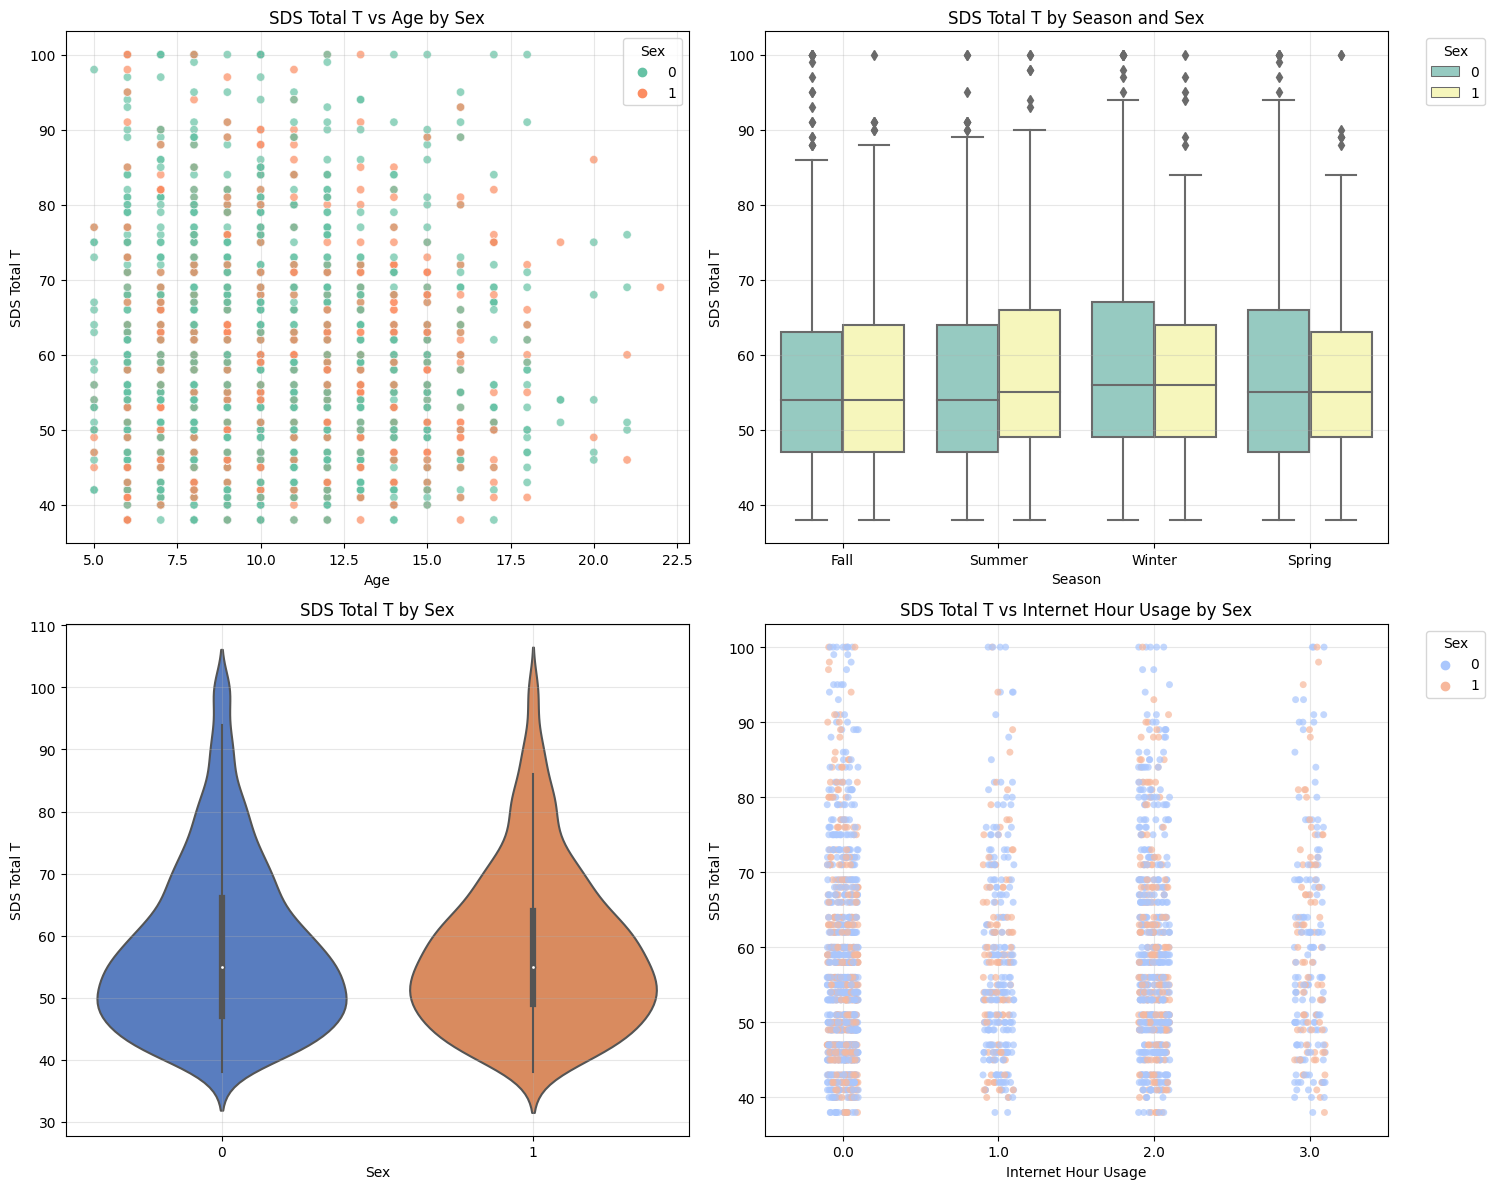

In [62]:
sds_t_column = 'SDS-SDS_Total_T'
age_column = 'Basic_Demos-Age'
sex_column = 'Basic_Demos-Sex'
season_column = 'SDS-Season'
internet_usage_column = 'PreInt_EduHx-computerinternet_hoursday'

required_columns = ['SDS-SDS_Total_T', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'SDS-Season', 'PreInt_EduHx-computerinternet_hoursday']

plot_data = train[required_columns].dropna()
    
plt.figure(figsize=(15, 12))
    
    # Scatter plot: SDS Total T vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(data=plot_data, x=age_column, y=sds_t_column, hue=sex_column, alpha=0.7, palette='Set2')
plt.title('SDS Total T vs Age by Sex')
plt.xlabel('Age')
plt.ylabel('SDS Total T')
plt.legend(title='Sex')
plt.grid(alpha=0.3)
    
    # Box plot: SDS Total T by Season
plt.subplot(2, 2, 2)
sns.boxplot(data=plot_data, x=season_column, y=sds_t_column, hue=sex_column, palette='Set3')
plt.title('SDS Total T by Season and Sex')
plt.xlabel('Season')
plt.ylabel('SDS Total T')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
    
    # Violin plot: SDS Total T by Sex
plt.subplot(2, 2, 3)
sns.violinplot(data=plot_data, x=sex_column, y=sds_t_column, palette='muted', inner='box')
plt.title('SDS Total T by Sex')
plt.xlabel('Sex')
plt.ylabel('SDS Total T')
plt.grid(alpha=0.3)


#  Scatter plot: SDS Total T vs Internet Usage
plt.subplot(2, 2, 4)
sns.stripplot(
        data=plot_data,
        x=internet_usage_column,
        y=sds_t_column,
        hue=sex_column,
        palette='coolwarm',
        alpha=0.7,
        jitter=True
)
plt.title('SDS Total T vs Internet Hour Usage by Sex')
plt.xlabel('Internet Hour Usage')
plt.ylabel('SDS Total T')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
   
plt.tight_layout()
plt.show()

<div style="line-height:24px; font-size:16px"> 
      From these plot, there is not much we can say, as there are no clear association with age, gender, season or internet usage
</div>